In [1]:
# Rt = (Pt / Pt-1)-1

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from arch.unitroot import ADF, KPSS
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = yf.download("XU100.IS", period = "2Y", interval = "1d")[["Close"]]

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Close
Date,
2022-01-19,2042.099976
2022-01-20,2014.199951
2022-01-21,2011.199951
2022-01-24,1910.300049
2022-01-25,1945.099976


In [5]:
data["Getiri"] = data.pct_change()
data.head()

,Close,Getiri
Date,,
2022-01-19,2042.099976,NaN
2022-01-20,2014.199951,-0.013662
2022-01-21,2011.199951,-0.001489
2022-01-24,1910.300049,-0.050169
2022-01-25,1945.099976,0.018217


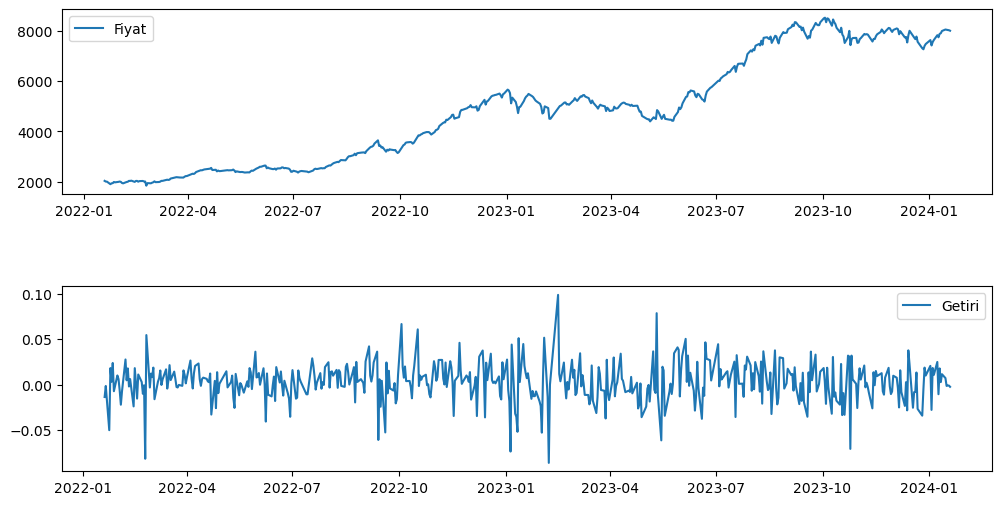

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
ax[0].plot(data["Close"], label = "Fiyat")
ax[0].legend()
ax[1].plot(data["Getiri"], label = "Getiri")
ax[1].legend()
plt.subplots_adjust(hspace=0.5)
plt.show();

In [7]:
adf_fiyat = ADF(data["Close"])
kpss_fiyat = KPSS(data["Close"])

print(adf_fiyat)
print(kpss_fiyat)

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.453
P-value                         0.901
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  3.453
P-value                         0.000
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [8]:
data = data.dropna()

adf_getiri = ADF(data["Getiri"])
kpss_getiri = KPSS(data["Getiri"])

print(adf_getiri)
print(kpss_getiri)

   Augmented Dickey-Fuller Results   
Test Statistic                 -9.886
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.110
P-value                         0.539
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
